In [6]:
from config import Config
from series_processing import process_series
from file_io import check_and_load_or_process
import numpy as np
from series_processing import process_series, bin_data
import matplotlib.pyplot as plt
import scipy
import pandas as pd

Text(0.5, 1.0, 'Transfer Funtion')

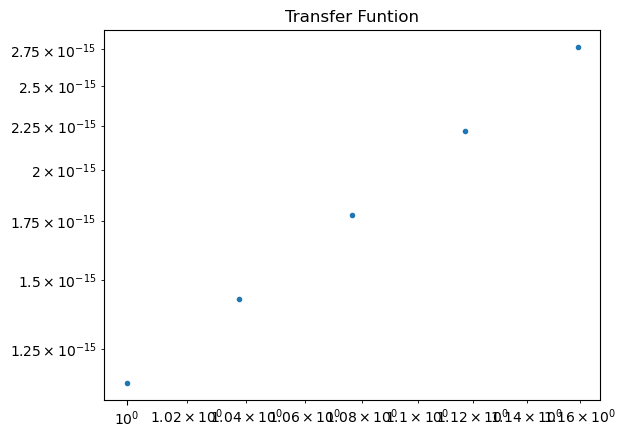

In [7]:
def transfer(freq, response):
    df = pd.read_csv(r"C:\Users\mcthu\OneDrive\Desktop\Lab Data\no_filter_response.txt")
    freqs = np.array(df[df.keys()[0]])
    r = np.array(df[df.keys()[1]])
    # Debug: Check for zeros in r
    if np.any(r == 0):
        print("Warning: Interpolation data contains zeros in the response column.")

    interpolation = scipy.interpolate.interp1d(freqs, r, fill_value = "extrapolate")

    def low_freq_fit(x):
        A, B =   -306.24611144, 184968.79274103
        C = 1 / (2*np.pi*10**-6*1000)
        Sallen_key = x**2 / (x**2 + A*x + B)
        RC_high_pass = x / (x +C )
        result = (Sallen_key * RC_high_pass) ** 2

        # Debug: Check for zeros in the low_freq_fit output
        if np.any(result == 0):
            print(f"Warning: low_freq_fit returned zero for input x = {x}")
        return result

    return np.where(freq < 10**5, response / low_freq_fit(freq), response / interpolation(freq))

# Check out the tranfer function

freq = np.logspace(0, 8, 500)  # Frequencies from 10 Hz to 1 MHz
flat_psd = np.ones_like(freq)  # Flat PSD
psd_combined_f = transfer(freq, flat_psd)

plt.plot(freq[0:5], (1/psd_combined_f)[0:5], ".")
plt.xscale("log")
plt.yscale("log")
plt.title("Transfer Funtion")

In [8]:
filename = r"C:\Users\mcthu\OneDrive\Desktop\Lab Data\20250131\smaller_aligned2"
offset = 513843715
num_files = 6
traces_per_file = 2

traces_HP = check_and_load_or_process("", offset, filename, "X", num_files, traces_per_file)

time_hp = np.arange(0, len(traces_HP[0]['series']))
conf_hp = Config(**traces_HP[0]['args'])
time_hp = time_hp * (1/conf_hp.sampling_rate)

# plt.figure(figsize=(10, 6))
# for trace in traces_HP:
#     plt.plot(time_hp, trace['series'], linewidth = .05)
#
# plt.title("High Power Traces")
# plt.show()

Processing data for 
Reading  C:\Users\mcthu\OneDrive\Desktop\Lab Data\20250131\smaller_aligned2 0
data_col  X
Reading  C:\Users\mcthu\OneDrive\Desktop\Lab Data\20250131\smaller_aligned2 1
data_col  X
Reading  C:\Users\mcthu\OneDrive\Desktop\Lab Data\20250131\smaller_aligned2 2
data_col  X
Reading  C:\Users\mcthu\OneDrive\Desktop\Lab Data\20250131\smaller_aligned2 3
data_col  X
Reading  C:\Users\mcthu\OneDrive\Desktop\Lab Data\20250131\smaller_aligned2 4
data_col  X
Reading  C:\Users\mcthu\OneDrive\Desktop\Lab Data\20250131\smaller_aligned2 5
data_col  X
MASS TOTAL IS 1.1309733552923254e-14


In [9]:
bin = 1
all_hp_series = []

for trace in traces_HP:
    series = bin_data(trace['series'], bin)
    all_hp_series.append(series)

In [10]:
# # LOWPASS
#
# from scipy.signal import butter, lfilter, freqz
#
# def butter_lowpass(cutoff, fs, order=5):
#     return butter(order, cutoff, fs=fs, btype='low', analog=False)
#
# def butter_lowpass_filter(data, cutoff, fs, order=5):
#     b, a = butter_lowpass(cutoff, fs, order=order)
#     y = lfilter(b, a, data)
#     return y
#
# # Filter requirements.
# order = 6
# fs = conf_hp.sampling_rate/bin
# print(fs)
# # sample rate, Hz
# cutoff = 5e5  # desired cutoff frequency of the filter, Hz
#
# # Get the filter coefficients so we can check its frequency response.
# b, a = butter_lowpass(cutoff, fs, order)
#
# # Plot the frequency response.
# w, h = freqz(b, a, fs=fs, worN=8000)
# plt.subplot(2, 1, 1)
# plt.plot(w, np.abs(h), 'b')
# plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
# plt.axvline(cutoff, color='k')
# # plt.yscale('log')
# plt.xscale('log')
# plt.title("Lowpass Filter Frequency Response")
# plt.xlabel('Frequency [Hz]')
# plt.grid()


In [11]:
# all_f_series = []
# for series in all_hp_series:
#     f_series = butter_lowpass_filter(series, cutoff, fs, order)
#     all_f_series.append(f_series)

25000000.0
25000000.0
25000000.0
25000000.0
25000000.0
25000000.0
25000000.0
25000000.0
25000000.0
25000000.0
25000000.0
25000000.0


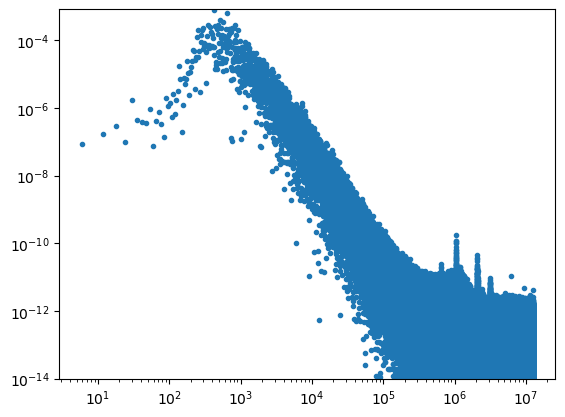

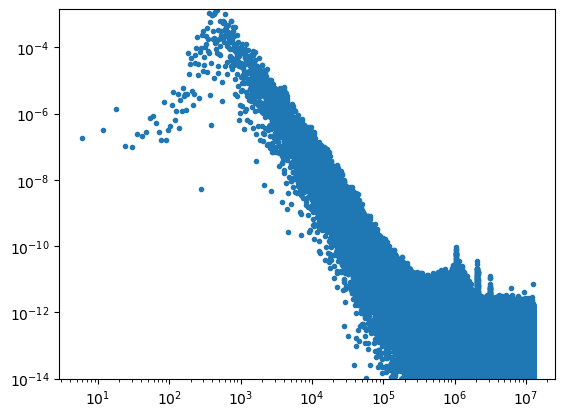

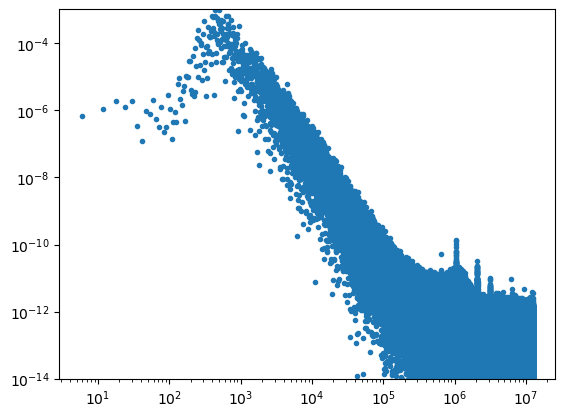

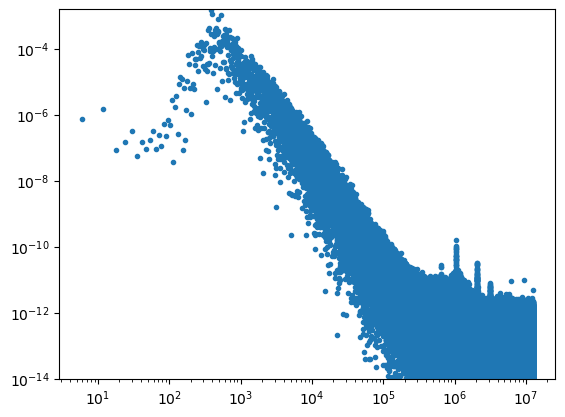

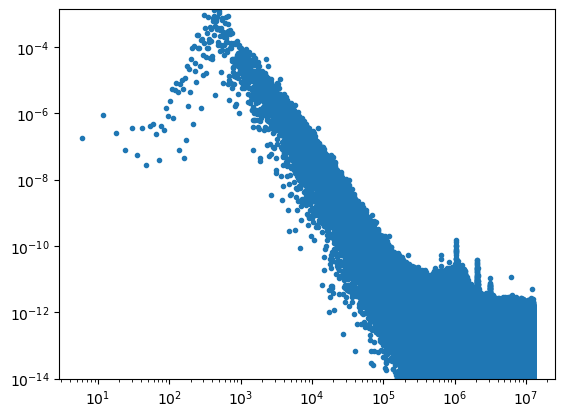

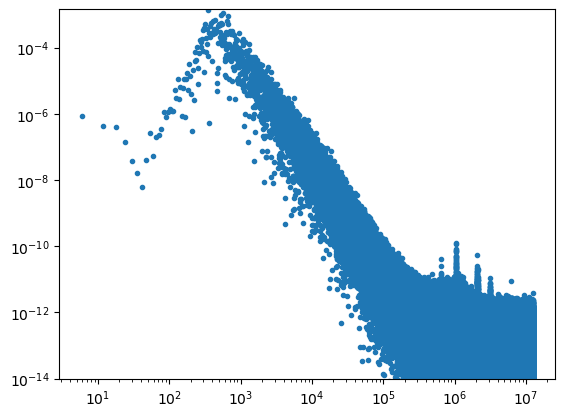

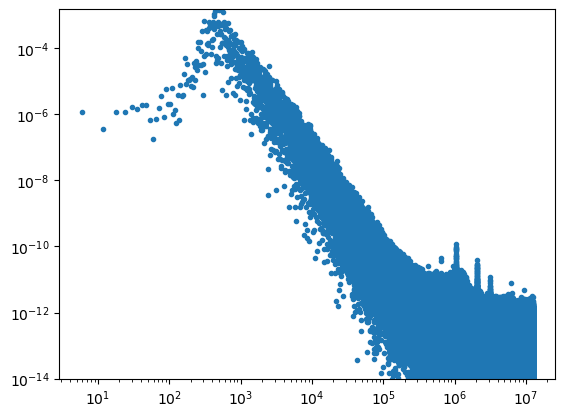

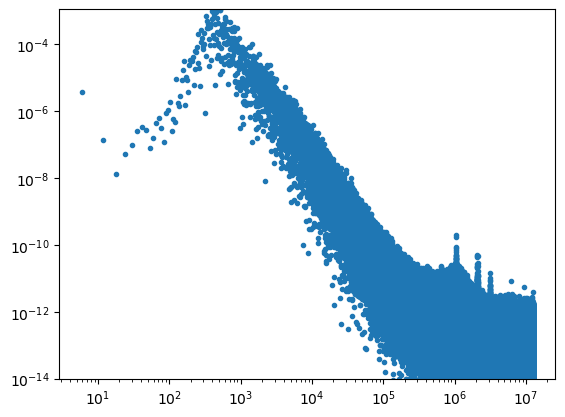

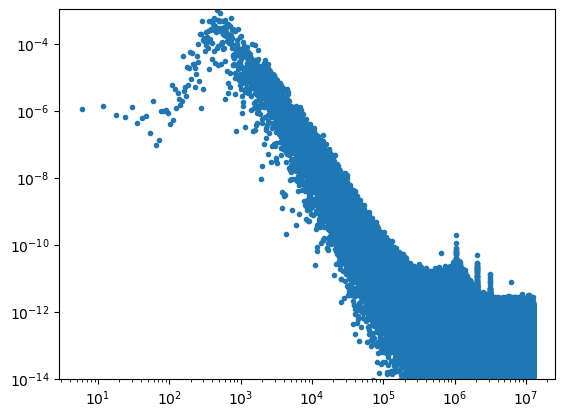

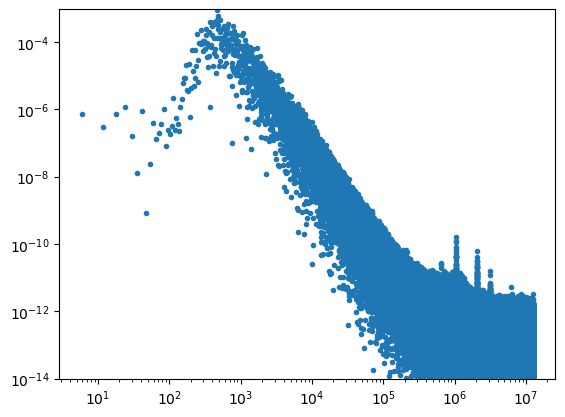

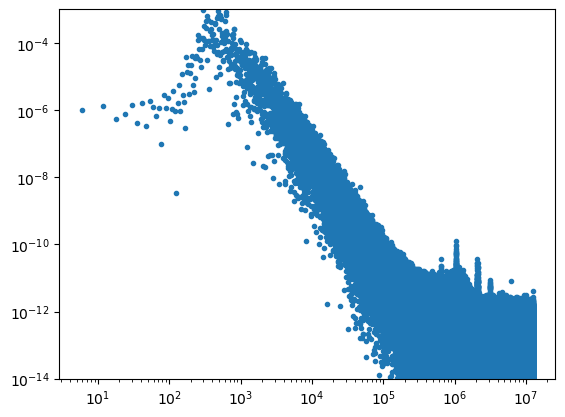

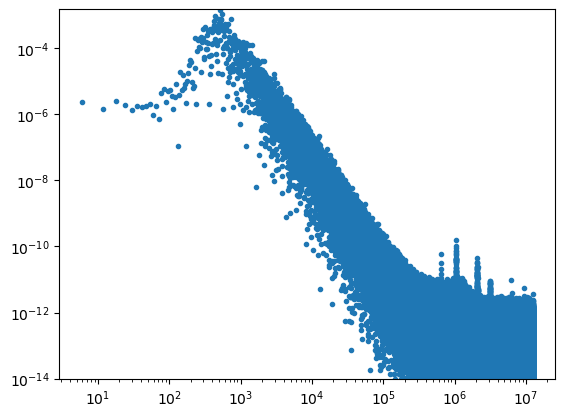

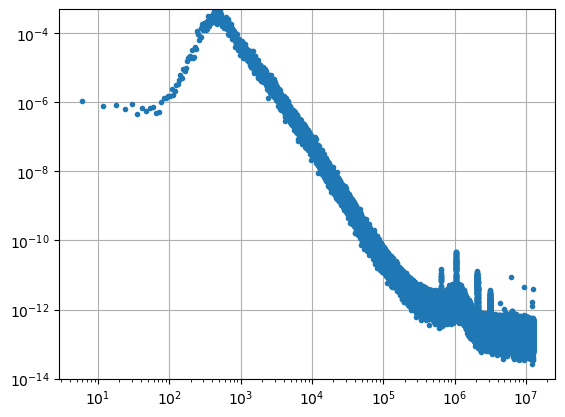

In [12]:
all_hp_psd = []
frequency = 0

for series in all_hp_series:
    frequency, psd = scipy.signal.periodogram(series, fs=conf_hp.sampling_rate/bin, scaling="density")
    print(conf_hp.sampling_rate/bin)
    frequency = frequency[1:]
    psd = psd[1:]
    all_hp_psd.append(psd)
for psd in all_hp_psd:
    plt.plot(frequency, psd, ".")
    plt.ylim(bottom=1e-14)
    # plt.xlim(left=1e4)
    plt.xscale('log')
    plt.yscale('log')
    plt.show()

hp_avg_psd = np.mean(all_hp_psd, axis=0)

plt.plot(frequency, hp_avg_psd, ".")
plt.ylim(bottom=1e-14)
# plt.xlim(left=1e4)
plt.xscale('log')
plt.yscale('log')
plt.grid()

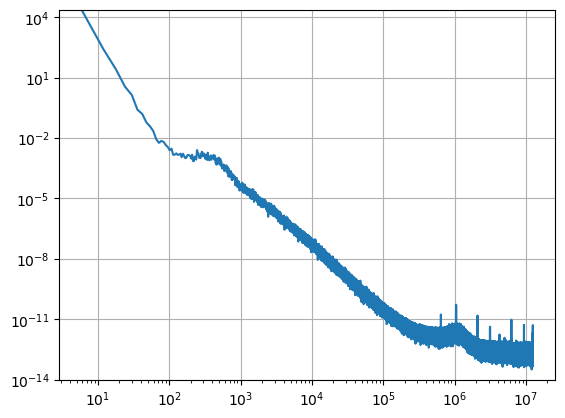

In [13]:
#Divide by Transfer Function
psd_transfer = transfer(frequency, hp_avg_psd)

plt.plot(frequency, psd_transfer)
plt.ylim(bottom=1e-14)
# plt.xlim(left=1e4)
plt.xscale('log')
plt.yscale('log')
plt.grid()

Processing data for 
Reading  C:\Users\mcthu\OneDrive\Desktop\Lab Data\20250128\trap_K_compare2_bright 0
data_col  X
Reading  C:\Users\mcthu\OneDrive\Desktop\Lab Data\20250128\trap_K_compare2_bright 1
data_col  X
Reading  C:\Users\mcthu\OneDrive\Desktop\Lab Data\20250128\trap_K_compare2_bright 2
data_col  X
Reading  C:\Users\mcthu\OneDrive\Desktop\Lab Data\20250128\trap_K_compare2_bright 3
data_col  X
MASS TOTAL IS 1.1309733552923254e-14


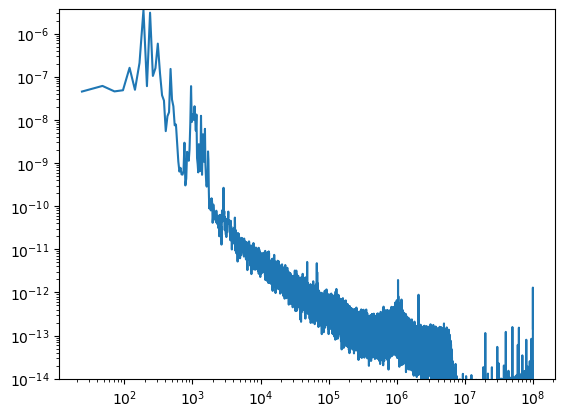

In [14]:
filename = r"C:\Users\mcthu\OneDrive\Desktop\Lab Data\20250128\trap_K_compare2_bright"
offset = 538551536
num_files = 4
traces_per_file = 2

traces_HPb = check_and_load_or_process("", offset, filename, "X", num_files, traces_per_file)

time_hp = np.arange(0, len(traces_HPb[0]['series']))
conf_hp = Config(**traces_HPb[0]['args'])
time_hp = time_hp * (1/conf_hp.sampling_rate)

all_hp_seriesb = []

for trace in traces_HPb:
    seriesb = bin_data(trace['series'], bin)
    all_hp_seriesb.append(seriesb)

all_hp_psdb = []
frequencyb = 0

for seriesb in all_hp_seriesb:
    frequencyb, psd = scipy.signal.periodogram(seriesb, fs=conf_hp.sampling_rate/bin, scaling="density")
    frequencyb = frequencyb[1:]
    psd = psd[1:]
    all_hp_psdb.append(psd)

hp_avg_psdb = np.mean(all_hp_psdb, axis=0)

plt.plot(frequencyb, hp_avg_psdb)
plt.ylim(bottom=1e-14)
# plt.xlim(left=1e4)
plt.xscale('log')
plt.yscale('log')

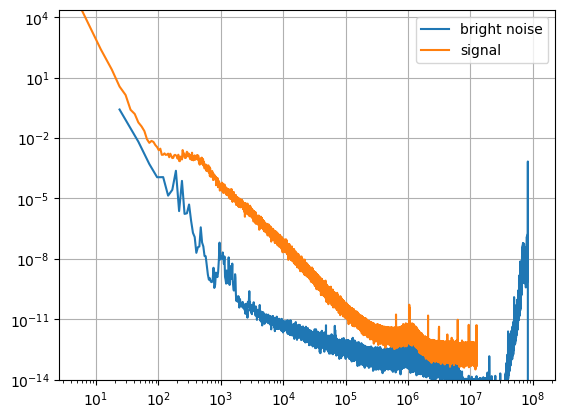

In [15]:
psd_transferb = transfer(frequencyb, hp_avg_psdb)
plt.plot(frequencyb, psd_transferb, label = "bright noise")
plt.plot(frequency, psd_transfer, label = "signal")
plt.ylim(bottom=1e-14)
# plt.xlim(left=1e4)
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.legend()

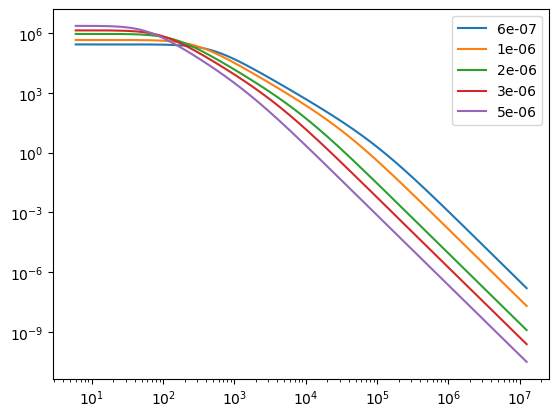

In [16]:
import math
import scipy.constants as const
eta=3e-4
rho_bati=6000
rho_f=790
T=293

def PSD_fitting_func(omega, m, K, a, V):
    # This is the PSD we look to fit.  We fit for 3 parameters
    # Namely, we fit for the trap strength K, the radius of the particle a, and the voltage to position conversion V
    gamma_s = 6 * math.pi * a * eta
    tau_f = rho_f * a ** 2 / eta
    numerator = 2 * const.k * T * gamma_s * (1 + np.sqrt((1/2) * omega * tau_f))
    denominator = (m*((K/m)-omega**2) - omega * gamma_s * np.sqrt((1 / 2) * omega * tau_f)) ** 2 + omega**2 * gamma_s**2 * (
                1 + np.sqrt((1/2) * omega * tau_f))**2
    return V**2 * numerator / denominator

a_s = np.array([6e-7, 1e-6, 2e-6, 3e-6, 5e-6])
m_s = (4 / 3) * math.pi * a_s ** 3 * rho_bati

for i in range(len(a_s)):
    fit = PSD_fitting_func(2*math.pi*frequency, m_s[i], 1e-5, a_s[i], 1e12)
    plt.plot(frequency, fit, label = str(a_s[i]))
#
# eta=5.5e-4
# rho_f=1930
#
# for i in range(len(a_s)):
#     fit = PSD_fitting_func(2*math.pi*frequency, m_s[i], 1e-5, a_s[i], 1e12)
#     plt.plot(frequency, fit, label = str(a_s[i])+" fl")
# plt.ylim(bottom=1e-5)
# plt.ylim(top=1e10)
# plt.xlim(left=1e4)
plt.xscale('log')
plt.yscale('log')
plt.legend()

In [17]:
def log_bin_array(x, y, min_bound, max_bound, num_bins):
    # Define log-spaced bins
    bins = np.logspace(np.log10(min_bound), np.log10(max_bound), num_bins + 1)
    binned_x = []
    binned_y = []

    # Loop through each bin and average the PSD values within the bin range
    for i in range(len(bins) - 1):
        # Get indices within the current bin
        indices = np.where((x >= bins[i]) & (x < bins[i + 1]))[0]

        # Compute average frequency and PSD value for this bin if indices are found
        if len(indices) > 0:
            avg_freq = np.mean(x[indices])
            avg_psd = np.mean(y[indices])
            binned_x.append(avg_freq)
            binned_y.append(avg_psd)

    return np.array(binned_x), np.array(binned_y)

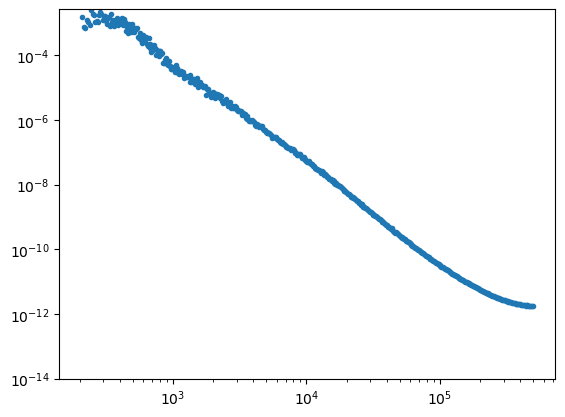

In [18]:
from scipy.optimize import minimize
def PSD_fitting(freq, PSD, a, m, k, v):
    # This function does the actual fitting
    print(a, m, k, v)
    def likelihood_func(x):
        # This defines the metric that we look to minimize under the maximum likelihood
        # formalism.  The parameters that minimize this function for a given data set
        # are the most probable actual parameters for this function.  A good look
        # at its derivation for Brownian motion can be seen in Henrik's 2018 paper
        # The exact for depends on the type of noise; this one works for the gamma
        # distributed noise we expect from Brownian motion spectra
        P = PSD_fitting_func(freq * 2 * np.pi, x[0]*1e-14, x[1], x[2], x[3])
        likelihood = np.sum(PSD / (P) + np.log(P))
        # print(f"Function evaluation: x={x}, Likelihood={likelihood}")
        return likelihood

    # Note to help out the python minimization problem, we rescale our initial guesses for the parameters so
    # that they are on order unity.  I could not get this to work well without adding this feature
    options = {
        'disp': True,  # Display convergence information
        'maxiter': 10000,  # Increase max iterations for complex problems
        'xatol': 1e-8  # Tolerance for convergence
    }
    optimal_parameters = minimize(
        likelihood_func,
        np.array([m * 1e14, k, a, v]),
        bounds=[(m * 1e12, m * 1e14), (k * 1e-2, k * 1e2), (a * 1e-2, a * 1e2), (v * 1e-2, v * 1e2)],
        method="Nelder-Mead",
        options=options
    )
    print("Message: ", optimal_parameters.x, optimal_parameters.success, optimal_parameters.message)
    return optimal_parameters

# Guesses!!!
a = 20e-7
k = 30e-6
v = 5e7
guesses = [a, (4 / 3) * math.pi * a ** 3 * rho_bati, k, v]

# Clip frequencies and PSD
cutoff = 2e2 # Define the cutoff frequency (1000 Hz)
mask = frequency >= cutoff  # Create a mask for frequencies above the cutoff
frequency = frequency[mask]  # Retain only frequencies above the cutoff
psd_transfer = psd_transfer[mask]

# Clip frequencies and PSD
cutoff = 5e5  # Define the cutoff frequency (1000 Hz)
mask = frequency <= cutoff  # Create a mask for frequencies above the cutoff
frequency = frequency[mask]  # Retain only frequencies above the cutoff
psd_transfer = psd_transfer[mask]

frequency, psd_transfer = log_bin_array(frequency, psd_transfer, frequency[0], frequency[-1], 500)


plt.plot(frequency, psd_transfer, ".")
plt.ylim(bottom=1e-14)
# plt.xlim(left=1e4)
plt.xscale('log')
plt.yscale('log')


2e-06 2.0106192982974675e-13 3e-05 50000000.0
Optimization terminated successfully.
         Current function value: -7670.279910
         Iterations: 410
         Function evaluations: 797
Message:  [2.01061930e+01 3.31261816e-06 1.87396081e-06 5.49229747e+07] True Optimization terminated successfully.
Parameters =  [2.01061930e-13 3.31261816e-06 1.87396081e-06 5.49229747e+07]


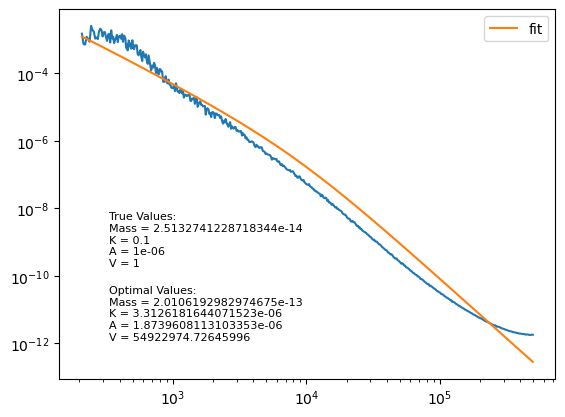

In [19]:
optimal_parameters = PSD_fitting(frequency, psd_transfer, guesses[0], guesses[1], guesses[2], guesses[3])
optimal_parameters.x[0] = optimal_parameters.x[0]*1e-14
PSD_fit = PSD_fitting_func(frequency * 2 * np.pi, optimal_parameters.x[0], optimal_parameters.x[1], optimal_parameters.x[2], optimal_parameters.x[3])

print("Parameters = ", optimal_parameters.x)
plt.text(0.1, 0.1, f"Optimal Values:\nMass = {optimal_parameters.x[0]}\nK = {optimal_parameters.x[1]}\nA = {optimal_parameters.x[2]}\nV = {optimal_parameters.x[3]}",
         fontsize=8, ha='left', va='bottom', transform=plt.gca().transAxes)
plt.text(0.1, 0.3, f"True Values:\nMass = {m_s[1]}\nK = {.1}\nA = {a_s[1]}\nV = {1}",
         fontsize=8, ha='left', va='bottom', transform=plt.gca().transAxes)

plt.plot(frequency, psd_transfer)

plt.plot(frequency, PSD_fit, label="fit")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.show()

In [20]:
density = optimal_parameters.x[0]/((4 / 3) * math.pi * optimal_parameters.x[2] ** 3)
print("density is " + str(density) + " compared to " + str(rho_bati))

density is 7293.898636650059 compared to 6000


In [21]:
from tqdm import tqdm

def compute_VACF_time_domain(v_series):
    n = len(v_series)
    vacf = np.zeros(n)
    for lag in tqdm(range(n), desc="VACF Compute"):
        vacf[lag] = np.dot(v_series[:n - lag], v_series[lag:]) / (
                n - lag)  # Normalize by number of overlapping terms
    return vacf

all_vacf = []

for series in all_hp_series:
    time = np.arange(0, len(series))
    time = time * (bin/conf_hp.sampling_rate)
    v_series = np.diff(series) / np.diff(time)
    vacf = compute_VACF_time_domain(v_series)
    all_vacf.append(vacf)

VACF Compute:  10%|▉         | 406099/4194303 [04:40<43:40, 1445.63it/s]  


KeyboardInterrupt: 

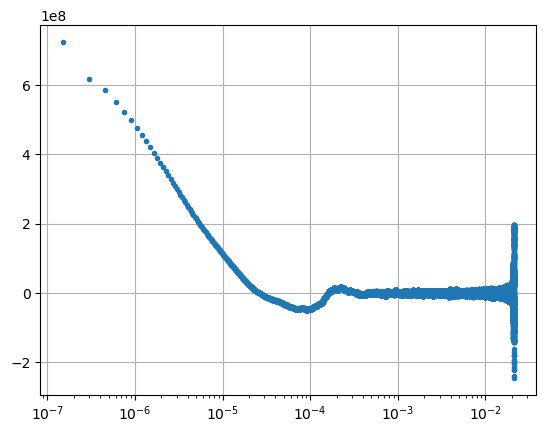

In [17]:
avg_vacf = np.mean(all_vacf, axis=0)

plt.plot(time[1:], avg_vacf, ".")
plt.xscale('log')
plt.grid()

In [ ]:
from tqdm import tqdm
def compute_msd(time_trace, dt):
    """
    Compute the Mean Squared Displacement (MSD) for a 1D time trace.

    Parameters:
        time_trace (numpy.ndarray): 1D array of position values.
        dt (float): Time interval between consecutive points in the time trace.

    Returns:
        numpy.ndarray: Array of MSD values for each lag time.
        numpy.ndarray: Array of corresponding lag times.
    """
    n = len(time_trace)
    msd = np.zeros(n)  # Allocate array for MSD
    lag_times = np.arange(n) * dt  # Calculate lag times

    for tau in tqdm(range(n)):
        displacements = time_trace[tau:] - time_trace[:n - tau]
        msd[tau] = np.mean(displacements**2)

    return msd, lag_times

all_hp_msd = []
lag_times = 0
for series in all_hp_series:
    print("new series")
    msd, lag_times = compute_msd(series, bin/conf_hp.sampling_rate)
    all_hp_msd.append(msd)

hp_avg_msd = np.mean(all_hp_msd, axis=0)

new series


100%|██████████| 139810/139810 [00:27<00:00, 5075.27it/s] 


new series


100%|██████████| 139810/139810 [00:25<00:00, 5448.81it/s] 


new series


100%|██████████| 139810/139810 [00:26<00:00, 5375.85it/s] 


new series


100%|██████████| 139810/139810 [00:27<00:00, 5174.31it/s] 


new series


100%|██████████| 139810/139810 [01:07<00:00, 2070.19it/s] 


new series


  7%|▋         | 9928/139810 [00:20<03:08, 688.42it/s]

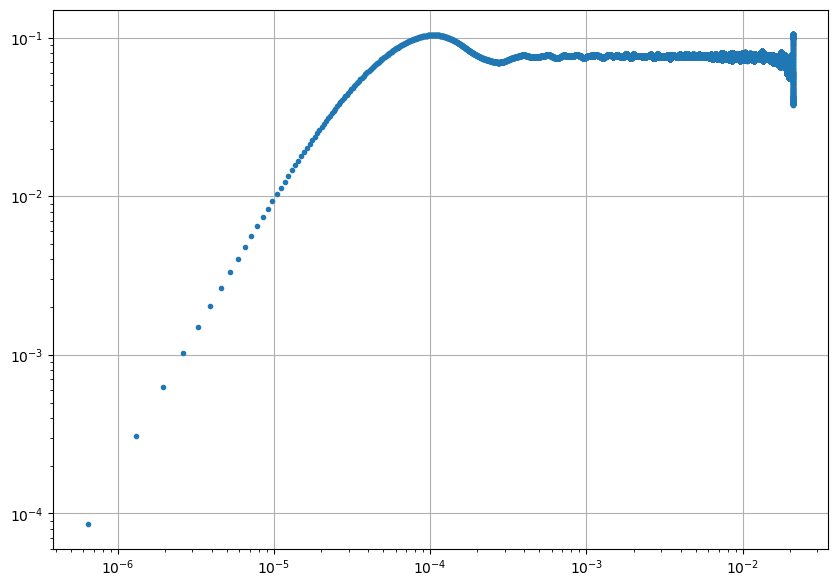

In [19]:
plt.figure(figsize=(10, 7))
plt.plot(lag_times, hp_avg_msd, ".", label='HP Average MSD')
plt.xscale("log")
plt.yscale("log")
plt.grid(True)

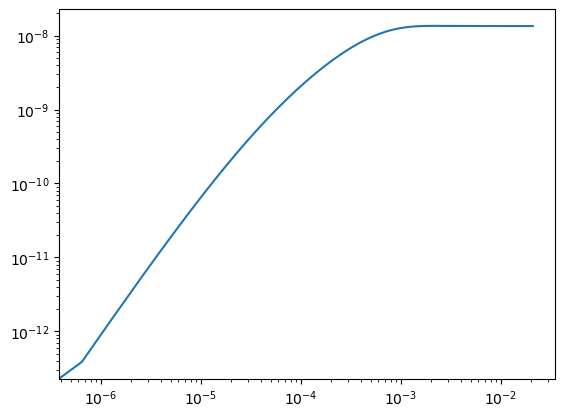

In [20]:
def MSD_fitting_func(t, a, m, K, V):
    trap_const = K
    use_mass = m
    m_f = 2 / 3 * np.pi * a ** 3 * 1000
    t_k = (6 * np.pi * a * eta) / K
    t_f = (rho_f * a ** 2) / eta
    t_p = m / (6 * np.pi * a * eta)
    # find roots
    # a * z^4 + b * z^3 + c * z^2 + d * z + e = 0
    a_ = t_p
    b = -1 * np.sqrt(t_f)
    c = 1
    d = 0
    e = 1 / t_k

    # Coefficients array for the polynomial equation
    coefficients = [a_, b, c, d, e]

    # Find the roots
    roots = np.roots(coefficients)

    # I need to learn how to vectorize my code better
    term_1 = scipy.special.erfcx(roots[0] * np.sqrt(t)) / (
                roots[0] * (roots[0] - roots[1]) * (roots[0] - roots[2]) * (roots[0] - roots[3]))
    term_2 = scipy.special.erfcx(roots[1] * np.sqrt(t)) / (
                roots[1] * (roots[1] - roots[0]) * (roots[1] - roots[2]) * (roots[1] - roots[3]))
    term_3 = scipy.special.erfcx(roots[2] * np.sqrt(t)) / (
                roots[2] * (roots[2] - roots[1]) * (roots[2] - roots[0]) * (roots[2] - roots[3]))
    term_4 = scipy.special.erfcx(roots[3] * np.sqrt(t)) / (
                roots[3] * (roots[3] - roots[1]) * (roots[3] - roots[2]) * (roots[3] - roots[0]))

    D = const.k * T / (6 * np.pi * eta * a)
    # Returns theoretical MSD
    return np.real(V * (2 * const.k * T / trap_const + 2 * const.k * T / (use_mass) * (
                term_1 + term_2 + term_3 + term_4)))


fit = MSD_fitting_func(lag_times, guesses[0], guesses[1], guesses[2], guesses[3])
plt.plot(lag_times, fit)
# plt.xlim(left=1e4)
plt.xscale('log')
plt.yscale('log')


In [21]:
density = optimal_parameters.x[0]/((4 / 3) * math.pi * optimal_parameters.x[2] ** 3)
print("density is " + str(density) + " compared to " + str(rho_bati))

density is 36828.64470263451 compared to 6000
